## **Model 13: Model 11 (Adam + batch size 16) + Dropout (0.3)**

Model 11 was chosen out of the models 9, 10, 11 and 12 because:
- It has the highest test accuracy (0.9573).
- Lowest validation loss (0.1417), meaning it generalizes the best.
- Training was stable (no severe overfitting).

**Preprocessing with batch size = 16**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [2]:
def build_medium_cnn_leakyrelu_dropout(input_shape=(128,128,3), num_classes=4, dropout_rate=0.3):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(dropout_rate),   # Dropout added

        layers.Conv2D(64, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(dropout_rate),   # Dropout added

        layers.Conv2D(128, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(dropout_rate),   # Dropout added

        layers.Flatten(),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dropout(dropout_rate),   # Dropout before final classifier
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build Model 13
model13 = build_medium_cnn_leakyrelu_dropout()
model13.summary()


d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        min_delta=1e-3, 
        restore_best_weights=True, 
        verbose=1
    ),
          
    ModelCheckpoint(
        filepath='models/model13_best.h5', 
        monitor='val_loss', 
        save_best_only=True, 
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=3, 
        min_lr=1e-6, 
        verbose=1
    )
]

**Compile**

In [4]:
model13.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [5]:
history13 = model13.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5987 - loss: 0.9870
Epoch 1: val_loss improved from None to 0.59366, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.7128 - loss: 0.7310 - val_accuracy: 0.7245 - val_loss: 0.5937 - learning_rate: 0.0010
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8116 - loss: 0.4819
Epoch 2: val_loss improved from 0.59366 to 0.56314, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.8335 - loss: 0.4277 - val_accuracy: 0.7535 - val_loss: 0.5631 - learning_rate: 0.0010
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8663 - loss: 0.3467
Epoch 3: val_loss improved from 0.56314 to 0.30286, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.8802 - loss: 0.3204 - val_accuracy: 0.8750 - val_loss: 0.3029 - learning_rate: 0.0010
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9125 - loss: 0.2339
Epoch 4: val_loss improved from 0.30286 to 0.29885, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9207 - loss: 0.2157 - val_accuracy: 0.8979 - val_loss: 0.2989 - learning_rate: 0.0010
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9465 - loss: 0.1555
Epoch 5: val_loss improved from 0.29885 to 0.21291, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - accuracy: 0.9447 - loss: 0.1584 - val_accuracy: 0.9243 - val_loss: 0.2129 - learning_rate: 0.0010
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9400 - loss: 0.1505
Epoch 6: val_loss improved from 0.21291 to 0.18797, saving model to models/model13_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 32s 111ms/step - accuracy: 0.9467 - loss: 0.1427 - val_accuracy: 0.9340 - val_loss: 0.1880 - learning_rate: 0.0010
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9677 - loss: 0.1009
Epoch 7: val_loss did not improve from 0.18797
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9642 - loss: 0.1075 - val_accuracy: 0.9428 - val_loss: 0.2075 - learning_rate: 0.0010
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9679 - loss: 0.0986
Epoch 8: val_loss did not improve from 0.18797
286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.9677 - loss: 0.0998 - val_accuracy: 0.9340 - val_loss: 0.2400 - learning_rate: 0.0010
Epoch 9/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9724 - loss: 0.0761
Epoch 9: val_loss did not improve from 0.18797

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9773 - loss: 0.0630 - val_ac

286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9551 - val_loss: 0.1779 - learning_rate: 5.0000e-04
Epoch 11/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9884 - loss: 0.0280
Epoch 11: val_loss did not improve from 0.17789
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9891 - loss: 0.0261 - val_accuracy: 0.9551 - val_loss: 0.1804 - learning_rate: 5.0000e-04
Epoch 12/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9906 - loss: 0.0268
Epoch 12: val_loss did not improve from 0.17789
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.9926 - loss: 0.0185 - val_accuracy: 0.9533 - val_loss: 0.1924 - learning_rate: 5.0000e-04
Epoch 13/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9907 - loss: 0.0194
Epoch 13: val_loss did not improve from 0.17789

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
286/286 ━━━━━━━━━━━━━━━━━━━━ 31s 107ms/step - accuracy: 0.9937 - lo

**Load best model**

In [6]:
best_model13 = tf.keras.models.load_model('models/model13_best.h5')

**Evaluate**

In [7]:
# Evaluate on test set
test_loss, test_acc = best_model13.evaluate(test_ds)
print(f"Model 13 (Dropout=0.3) - Test accuracy: {test_acc:.4f}")
print(f"Model 13 (Dropout=0.3) - Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history13.history['accuracy'][-1]
final_train_loss = history13.history['loss'][-1]
final_val_acc   = history13.history['val_accuracy'][-1]
final_val_loss  = history13.history['val_loss'][-1]

print(f"Model 13 (Dropout=0.3) - Final training accuracy: {final_train_acc:.4f}")
print(f"Model 13 (Dropout=0.3) - Final training loss: {final_train_loss:.4f}")
print(f"Model 13 (Dropout=0.3) - Final validation accuracy: {final_val_acc:.4f}")
print(f"Model 13 (Dropout=0.3) - Final validation loss: {final_val_loss:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9565 - loss: 0.1928
Model 13 (Dropout=0.3) - Test accuracy: 0.9565
Model 13 (Dropout=0.3) - Test loss: 0.1928
Model 13 (Dropout=0.3) - Final training accuracy: 0.9956
Model 13 (Dropout=0.3) - Final training loss: 0.0116
Model 13 (Dropout=0.3) - Final validation accuracy: 0.9560
Model 13 (Dropout=0.3) - Final validation loss: 0.2037


**Loss curve plotting**

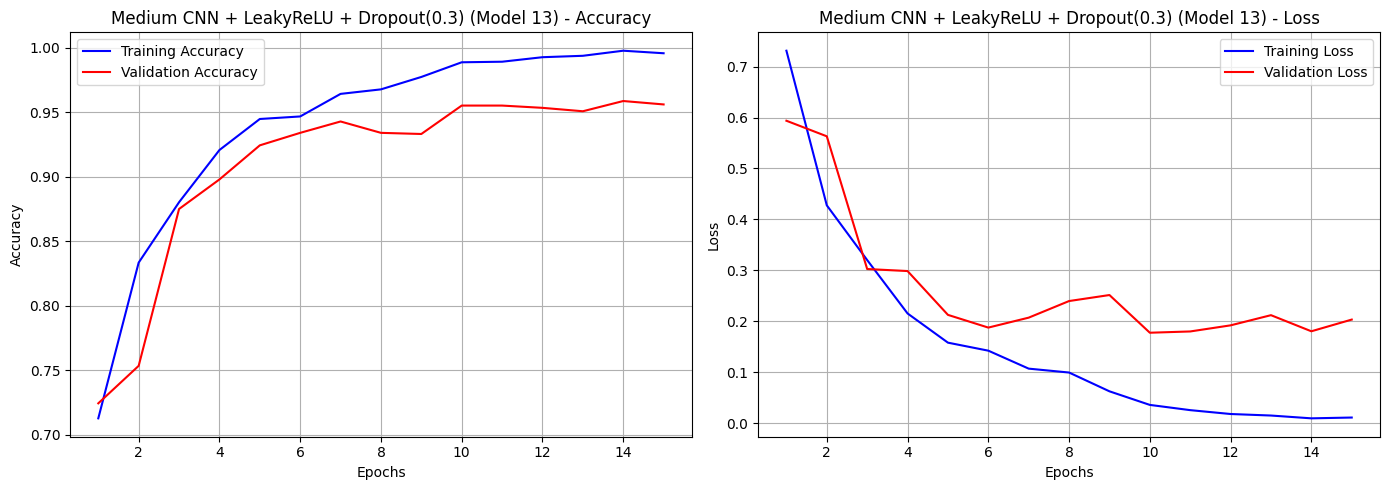

In [9]:
from plot import plot_training_curves
plot_training_curves(history13, model_name="Medium CNN + LeakyReLU + Dropout(0.3) (Model 13)")

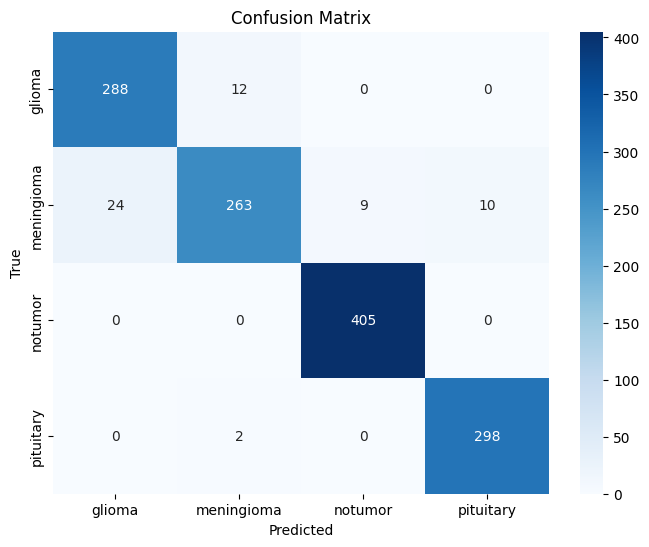


Classification Report:

              precision    recall  f1-score   support

      glioma       0.92      0.96      0.94       300
  meningioma       0.95      0.86      0.90       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



In [2]:
from plot_utils import (
    plot_training_curves,
    evaluate_model_with_confusion,
    plot_confusion_matrix_from_dataset
)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix with in-memory model
# evaluate_model_with_confusion(model19, test_ds, title="Confusion Matrix (Test)")

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model13_best.h5", test_ds, class_names)
